In [1]:
import numpy as np
import math
import sys

In [2]:

def kernel(x,y):
    return np.exp((-(x-y)**2)/2)

In [3]:
def computeMMD(x, y, N,i,j):
    # Convert x and y to numpy arrays
    x = np.array(x)
    y = np.array(y)
    
    # Compute kernel matrices using broadcasting
    Kxx = kernel(x[:, None], x[None, :])  # Kernel matrix for x with itself
    Kyy = kernel(y[:, None], y[None, :])  # Kernel matrix for y with itself
    Kxy = kernel(x[:, None], y[None, :])  # Kernel matrix for x with y

    # Calculate the MMD using vectorized operations
    MMD_squared = (np.sum(Kxx) + np.sum(Kyy) - 2 * np.sum(Kxy)) / (N**2)
    # print(i,j,MMD_squared)
    return np.sqrt(MMD_squared)


In [4]:
#lst = [[0,10,6,5,9],[10,0,8,7,2],[6,8,0,1,4],[5,7,1,0,3],[9,2,4,3,0]]
import random
M = 6      # total number of sequences
Mk = 5      # number of sequences per cluster
K = 2       # number of clusters
# N = 1500     # number of elements in 1 sequence
clusters = [[i] for i in range(M)]
# means = [0.4,0.55,0.7,0.85,1,1.15,1.3,1.45,1.6, 1.85,2,2.15]
#means = [i for i in range(K) for j in range(Mk)]
correct = [[0,1,2],[3,4,5]]
#correct = [[(Mk*i)+j for j in range(Mk)]for i in range(K)]
# print(means)
print(correct)
# with open('slink-fss-mmdnew100.txt', 'a') as f:
#     print(correct,means, file = f)

[[0, 1, 2], [3, 4, 5]]


In [ ]:
Nvec = [20,60,100,140,180,220,260,300,340,380,400]
# Nvec = [5,10,15,20,25,30,35,40,45,50,55,60,65,70,75]

Pe = np.zeros(len(Nvec))
lnPe=np.zeros(len(Nvec))

for ii in range(len(Nvec)):
    N = Nvec[ii]
    total = 0
    error = 0
    while total < 3500:

        clusters = [[i] for i in range(M)]
        total += 1
        lst = [[] for i in range(M)]
        # a = [np.random.normal(means[i],1,(1,N)) for i in range(M)]
        # y = np.asarray(a)
        # y = np.vstack(y)
        p = 0.7
        k = np.random.binomial(1,p,N)
        sample_1 = ((1 - k) ) * np.random.normal(-0.5, 1, (1,N)) + (k) * np.random.normal(0, 1, (1,N))
        k = np.random.binomial(1,p,N)
        sample_2 = ((1 - k) ) * np.random.normal(0, 1, (1,N)) + (k) * np.random.normal(0.5, 1, (1,N))
        k = np.random.binomial(1,p,N)
        sample_3 = ((1 - k)) * np.random.normal(0.5, 1, (1,N)) + (k ) * np.random.normal(1, 1, (1,N))
        k = np.random.binomial(1,p,N)
        sample_4 = ((1 - k)) * np.random.normal(2, 1, (1,N)) + (k ) * np.random.normal(2.5, 1, (1,N))-0.8
        k = np.random.binomial(1,p,N)
        sample_5 = ((1 - k) ) * np.random.normal(2.5, 1, (1,N)) + (k) * np.random.normal(3, 1, (1,N))-0.8
        k = np.random.binomial(1,p,N)
        sample_6 = ((1 - k) ) * np.random.normal(3, 1, (1,N)) + (k) * np.random.normal(3.5, 1, (1,N)) - 0.8
        y = np.vstack((sample_1, sample_2, sample_3, sample_4, sample_5, sample_6))
        lst = [[computeMMD(y[i,:],y[j,:],N,i,j) for j in range(i+1)] for i in range(M)]

        for i in range(M):
            for j in range(M):
                if i<j:
                    lst[i].append(lst[j][i])
        #print(lst)
        n = 0
        while len(clusters)>K:

            ####    FIND MINIMUM    ####
        
            #mi = sys.float_info.max
            mi = 100
            for i in range(len(lst)):
                for j in range(i+1):
                    if i != j:
                        if lst[i][j] < mi:
                            mi = lst[i][j]
                            a,b = [i,j]
            #print(a,b)
            clusters[b].extend(clusters[a])
            del clusters[a]
            #print(clusters)

            ####    MERGE ROWS  ####

            for i in range(len(lst[b])):        #merge rows 'a' and 'b'
                if min(lst[a][i],lst[b][i]) != 0:
                    lst[b][i] = min(lst[a][i],lst[b][i])
            del lst[a]

            ####    UPDATE ROWS     ####

            for i in range(len(lst)):       #update all other rows
                if i!=b:
                    lst[i][b] = min(lst[i][a],lst[i][b])
                del lst[i][a]   #new statement

            #print('dist matrix', lst)
            #print('dist matrix 2', dist)
            # print('clusters',clusters)
            n = n+1

        clusters.sort()
        C_sort = []
        for x in clusters:
            x.sort()
            C_sort.append(x)

        #print(C_sort)
        #print(centers)

        if correct != C_sort:
            error = error + 1
            #print('L')
        #else:
            #print('W')
        # print(error,total)


    Pe[ii] = error/total
    lnPe[ii] = math.log(Pe[ii])
    print(total,Pe[ii],lnPe[ii])

    # with open('slink-fss-mmdnew100.txt', 'a') as f:
    #     print(N,lnPe[ii], file = f)

[-0.42028872 -0.64191103 -0.78965808 -0.95043862 -1.09575922 -1.28528616
 -1.34597535 -1.55793036 -1.69905007 -1.82369252 -1.87638409]
[20, 60, 100, 140, 180, 220, 260, 300, 340, 380, 400]


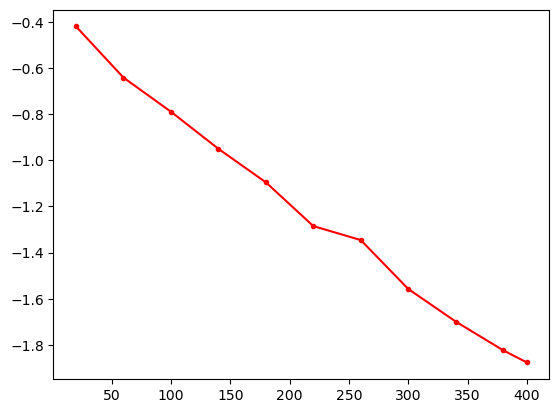

In [ ]:
import matplotlib.pyplot as plt
print(lnPe)
print(Nvec)
plt.plot(Nvec,lnPe,'-r.',label = 'MMD')
plt.show()
